In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
json_data_train=open('train.json')
data_train = json.load(json_data_train)

json_data_test=open('test.json')
data_test = json.load(json_data_test)

In [3]:
train=pd.DataFrame(data_train)
test=pd.DataFrame(data_test)

In [4]:
train.head()

cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

In [5]:
test.head()

id                                        ingredients
0  18009  [baking powder, eggs, all-purpose flour, raisi...
1  28583  [sugar, egg yolks, corn starch, cream of tarta...
2  41580  [sausage links, fennel bulb, fronds, olive oil...
3  29752  [meat cuts, file powder, smoked sausage, okra,...
4  35687  [ground black pepper, salt, sausage casings, l...

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.4+ KB


In [9]:
#df['ingredients']=df['ingredients'].map(lambda x: [ing.encode("utf-8") for ing in x])
#df['cuisine']=df['cuisine'].map(lambda x: x.encode("utf-8"))

In [10]:
train['cuisine'].nunique()

20

In [11]:
train['cuisine'].unique()

array([u'greek', u'southern_us', u'filipino', u'indian', u'jamaican',
       u'spanish', u'italian', u'mexican', u'chinese', u'british',
       u'thai', u'vietnamese', u'cajun_creole', u'brazilian', u'french',
       u'japanese', u'irish', u'korean', u'moroccan', u'russian'],
      dtype=object)

In [12]:
train['source']='train'
test['source']='test'

In [13]:
data = pd.concat([train, test], ignore_index=True, sort=True)
data.shape

(49718, 4)

In [14]:
data.tail()

cuisine     id                                        ingredients source
49713     NaN  30246  [large egg yolks, fresh lemon juice, sugar, bo...   test
49714     NaN  36028  [hot sauce, butter, sweet potatoes, adobo sauc...   test
49715     NaN  22339  [black pepper, salt, parmigiano reggiano chees...   test
49716     NaN  42525  [cheddar cheese, cayenne, paprika, plum tomato...   test
49717     NaN   1443  [cold water, olive oil, lime wedges, garlic cl...   test

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49718 entries, 0 to 49717
Data columns (total 4 columns):
cuisine        39774 non-null object
id             49718 non-null int64
ingredients    49718 non-null object
source         49718 non-null object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [16]:
data.isnull().sum()

cuisine        9944
id                0
ingredients       0
source            0
dtype: int64

## Lower case

In [17]:
data['ingredients']=data['ingredients'].map(lambda x:' '.join(x.lower() for x in x))

In [18]:
data.head()

cuisine     id                                        ingredients  \
0        greek  10259  romaine lettuce black olives grape tomatoes ga...   
1  southern_us  25693  plain flour ground pepper salt tomatoes ground...   
2     filipino  20130  eggs pepper salt mayonaise cooking oil green c...   
3       indian  22213                     water vegetable oil wheat salt   
4       indian  13162  black pepper shallots cornflour cayenne pepper...   

  source  
0  train  
1  train  
2  train  
3  train  
4  train

In [19]:
for i in range(data.shape[0]):
    print (data.loc[i,'ingredients'])

romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles
plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil
eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers
water vegetable oil wheat salt
black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf
plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder
olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage
sugar pistachio nuts white almond bark flour vanilla extract olive oil almond extrac

dijon mustard fresh lemon juice extra-virgin olive oil vegetable oil large egg yolks garlic cloves
vegetable oil all-purpose flour eggs buttermilk white sugar butter cornmeal baking soda salt
tomatoes curry powder green chilies ground turmeric fresh curry leaves salt onions coconut oil chili powder coconut milk ground cumin garlic paste coriander powder mustard seeds fish
pepper vegetable oil green chilies chuck whole peeled tomatoes salt serrano chile water cilantro beer flour yellow onion cumin
eggs pepper coarse salt purple onion feta cheese crumbles couscous boiling water pinenuts roasted red peppers red pepper flakes yellow onion greek yogurt ground beef black pepper olive oil baby spinach salt cucumber dill weed dried oregano nutmeg kosher salt grated parmesan cheese garlic lemon juice sour cream fresh parsley
honey flour dark brown sugar unsalted butter buttermilk baking soda baking powder stone-ground cornmeal large eggs fine sea salt
baby spinach leaves large eggs crushed red 

dry white wine freshly ground pepper olive oil lemon slices flat leaf parsley capers salt fresh lemon juice unsalted butter grated lemon zest boneless skinless chicken breast halves
baking powder salt baking soda cracked black pepper buttermilk all-purpose flour unsalted butter whipping cream
ground black pepper whole chicken eggs lemon orzo pasta water salt
russet potatoes cheese garlic cloves whole milk diced tomatoes all-purpose flour onions eggplant butter lamb shoulder coarse kosher salt dry white wine extra-virgin olive oil beef broth dried oregano
milk sirloin steak ground black pepper all-purpose flour garlic powder salt bacon drippings ground red pepper cornmeal
unsalted butter all-purpose flour sugar buttermilk pork sausages cheddar cheese baking powder chopped fresh sage baking soda salt
sugar green onions boiling water ground ginger black pepper all-purpose flour chicken broth kosher salt oil cold water ground chicken crushed red pepper flakes
corn tortillas ahi tuna steaks

salt black pepper lemon juice olive oil dried oregano baking potatoes
butter leeks salt light cream gruyere cheese refrigerated piecrusts
pepper garlic tomatoes cilantro onions lime salt skate wing light coconut milk
sugar golden raisins crushed pineapple ground nutmeg salt chopped pecans ground cinnamon large eggs all-purpose flour canola oil baking soda vanilla extract carrots
bay leaves salt black beans turkey sausage chicken stock brown rice onions water garlic
milk beef idaho potatoes salt cantal haricots verts ground black pepper vegetable oil sea salt carrots rib eye steaks olive oil shallots red wine baby carrots chervil unsalted butter butter port thyme
black pepper paprika dill pickles vegetable oil all-purpose flour baking powder salt cornmeal cold water cajun seasoning cayenne pepper
canned black beans roma tomatoes rice cooking oil romaine lettuce leaves chipotle colby jack cheese flour tortillas cilantro leaves
wafer salt vegetable oil pepper all-purpose flour
fresh basil

ground pork chinese noodles hot water black bean sauce oil russet potatoes cucumber
powdered sugar almond extract 1% low-fat milk cream cheese, soften light sour cream bosc pears vanilla extract lemon juice granulated sugar sunflower oil all-purpose flour bittersweet chocolate large eggs light corn syrup ground almonds
mahi mahi salt chopped cilantro fresh avocado lime wedges corn tortillas green cabbage reduced-fat sour cream fresh lime juice cooking spray salsa fajita seasoning mix
chicken stock olive oil ground veal garlic cloves dried oregano eggs dry white wine dry bread crumbs coriander nutmeg chopped tomatoes ground pork onions cumin tomato purée cinnamon cayenne pepper frozen peas
water salt long-grain rice vegetable oil hot sauce low salt chicken broth chicken breast halves all-purpose flour garlic cloves cajun style stewed tomatoes crushed red pepper okra
quince paste manchego cheese
tomato paste water salt white sugar green bell pepper ground nutmeg yellow onion ground cinna

sesame seeds vegetable oil sugar flank steak low sodium soy sauce green onions garlic cloves minced ginger sesame oil
water butter salt bread crumbs mushrooms gruyere cheese lemon juice flour heavy cream freshly ground pepper scallops dry white wine bouquet garni onions
dijon mustard kosher salt spring onions large eggs low-fat greek yogurt chives
garlic ground black pepper swanson chicken broth long grain white rice grated parmesan cheese
chicken broth self rising flour oil white pepper salt chicken legs vegetable oil chicken gravy water bacon fat
black beans salt avocado lime wedges chopped cilantro fresh tomatoes purple onion jalapeno chilies fresh lime juice
basil leaves garlic cloves extra-virgin olive oil balsamic vinegar fresh lemon juice radicchio ricotta
salmon fillets sesame oil brown sugar sesame seeds salad dressing water seasoned rice wine vinegar sake miso paste
orange salt powdered sugar fresh orange juice radishes fresh cilantro orange flower water
canola yeast granulat

cooked brown rice red curry paste water plain yogurt coconut milk red lentils baby spinach
pepper buttermilk green tomatoes all-purpose flour vegetable oil self-rising cornmeal large eggs salt
chervil unsalted butter crème fraîche white wine sea salt boiling water crusty bread mushrooms all-purpose flour ground black pepper button mushrooms
kosher salt sea scallops baby arugula all-purpose flour white pepper sauerkraut unsalted butter heavy cream smoked paprika white onion olive oil dijon mustard bacon sour cream chicken stock sumac cayenne dry white wine ground coriander
powdered sugar butter strawberries cooking spray vanilla extract bananas crepes mango mango chutney part-skim ricotta cheese
pork belly jalapeno chilies bay leaf accent seasoning kosher salt oil chicken stock pork blood cane vinegar onions fish sauce ground black pepper garlic cloves
lemon tomato paste salmon steaks reduced sodium soy sauce orange juice dijon mustard chopped garlic
baking potatoes rib water kielbasa e

white onion ground pepper hot sauce fresh cilantro coarse salt corn tortillas tilapia fillets red cabbage sour cream lime extra-virgin olive oil
olive oil provolone cheese salad grated parmesan cheese fresh parsley celery ribs sliced black olives red bell pepper pepper salami crostini
tomatoes minced meat all-purpose flour bay leaf pepper butter garlic cloves onions ground cinnamon whole milk cayenne pepper fresh parsley clove eggplant salt waxy potatoes
tumeric green mango green chilies curry leaves water garlic mustard seeds coconut oil coconut salt onions red chili peppers seeds cumin seed
beans fresh thyme leaves fresh basil leaves prosciutto large garlic cloves kosher salt napa cabbage parmigiano reggiano cheese extra-virgin olive oil
butter whole milk strawberry yogurt all-purpose flour baking powder
chicken broth epazote garlic cloves dried oregano vegetable oil pumpkin seeds onions tomatillos cumin seed chopped cilantro fresh jalapeno chilies salt fresh parsley
tomato purée but

wakame red chili peppers miso english cucumber fresh lime juice mushroom soy sauce fish sauce water rice vermicelli garlic cloves fresh basil leaves five spice kosher salt daikon oil onions chicken sugar lemongrass garlic red bell pepper peppercorns
tomato salsa cream cheese, soften goat cheese pinenuts chopped cilantro fresh
grated parmesan cheese crushed red pepper fresh rosemary yukon gold potatoes garlic cloves refrigerated pizza dough chopped fresh sage mozzarella cheese extra-virgin olive oil
silver raisins saffron threads milk basmati rice green cardamom pods light cream sliced almonds jaggery
low sodium soy sauce peeled fresh ginger dark sesame oil corn starch shiitake mushroom caps water black chinese five-spice powder baby corn jasmine rice green onions peanut oil red bell pepper sesame seeds rounds garlic cloves green soybeans
soy sauce olive oil bay leaves garlic chicken pieces white vinegar chili ground sage ground thyme orange juice molasses ground nutmeg green onions cil

red chili powder lemon wedge cayenne pepper cumin fresh cilantro garlic smoked paprika tomato paste fresh ginger salt chicken thighs plain yogurt vegetable oil lemon juice
butter pot roast pepperoncini au jus mix ranch dressing
dried porcini mushrooms unsalted butter garlic cloves cremini mushrooms reduced sodium chicken broth dry white wine flat leaf parsley arborio rice black pepper parmigiano reggiano cheese hot water soy sauce olive oil salt onions
sage leaves boneless chuck roast extra-virgin olive oil sage rosemary sprigs bay leaves thyme sprigs warm water sea salt onions dried plum ground black pepper baby carrots
lacinato kale reduced sodium chicken stock olive oil chopped garlic dry white wine kosher salt fresh lemon juice
clove red wine club soda honey apples peeled fresh ginger cinnamon sticks apple schnapps navel oranges
eggs ground nutmeg ground allspice sorghum molasses salt ground cloves apples white sugar ground cinnamon baking soda all-purpose flour
pico de gallo mexic

mint leaves fresh lemon juice rye whiskey liqueur
salt boneless skinless chicken breasts pepper salsa lime wedges
sticky rice
peanuts rome apples light brown sugar butter granulated sugar sundae syrup granny smith apples all-purpose flour
flour tortillas sauce mix onions shredded cheddar cheese lean ground beef sliced black olives
fresh spinach chili paste salt onions fresh ginger vegetable oil lemon juice sugar extra firm tofu garlic cloves ground cumin tumeric garam masala vegetable broth coconut milk
rosemary sprigs capicola dried apricot kalamata soppressata fish smoked salmon almonds parmigiano reggiano cheese asiago cornichons shrimp tomatoes manchego cheese dijon mustard meat extra-virgin olive oil freshly ground pepper pears breadstick prosciutto artichok heart marin sea salt cheese pickled vegetables
pepper chicken meat okra serrano peppers salt bok choy poblano peppers garlic beef sausage leeks meat bones oregano
fruit cocktail nestle table cream shredded cheddar cheese sugar

crab ginger corn starch sugar cooking oil oil fish sauce water scallions white pepper sesame oil oyster sauce
cooking spray ground allspice onions cider vinegar yukon gold potatoes carrots chorizo sausage brown sugar bay leaves garlic cloves chopped cilantro fresh water salt poblano chiles
peanuts cilantro sugar leaves soy clove ginger piece oil chili yardlong beans
large eggs pork loin chops pepper salt cabbage flour toasted sesame oil panko oil
tomato paste zucchini salt chopped parsley olive oil red wine garlic cloves spaghetti low fat cream grated parmesan cheese vegetable stock powder onions extra lean minced beef passata carrots dried oregano
bread crumb fresh flour cracked black pepper piment d'espelette ground lamb tomatoes olive oil shallots ras el hanout chopped fresh mint eggs leaves sea salt carrots chopped cilantro fresh tomato paste milk golden raisins garlic low sodium beef broth
warm water salt olive oil bread flour honey yeast fresh rosemary fresh thyme
water butter se

mayonaise garlic fresh parsley anchovy paste freshly ground pepper kosher salt anchovy fillets capers cornichons fresh lemon juice
lime butter coconut milk lime zest large eggs cream of coconut coconut flakes pies heavy whipping cream granulated sugar vanilla extract
salt unsalted butter baking potatoes black pepper
olive oil plum tomatoes pizza doughs black olives mozzarella cheese sliced mushrooms
whole wheat baguette cracked black pepper olive oil heirloom tomatoes cucumber fresh basil red wine vinegar purple onion basil leaves sea salt
green leaf lettuce scallions kosher salt extra-virgin olive oil flat leaf parsley baguette beets black pepper tapenade tuna
shrimp tails frozen corn green bell pepper white rice carrots diced tomatoes creole seasoning sausage links garlic onions
country crock honey spread chili powder lime juice chopped cilantro fresh red bell pepper, sliced garlic sweet onion ground cumin
tomatoes shredded lettuce cider vinegar sour cream pot roast salsa avocado chi

jasmine rice sesame oil peanut butter boneless skinless chicken breasts purple onion mirin cilantro soy sauce green tomatoes rice vinegar
low sodium soy sauce red curry paste water coconut milk sugar creamy peanut butter white vinegar sesame oil
peaches almond extract all-purpose flour eggs baking powder vanilla extract nutmeg unsalted butter cinnamon caramel sauce sugar peach schnapps salt
mayonaise diced green chilies boneless skinless chicken breasts juice lime juice red cabbage salt chopped cilantro cotija ground black pepper whole wheat tortillas poblano chiles green cabbage tabasco green pepper sauce green onions enchilada sauce
ground black pepper scallions manioc flour large eggs kosher salt extra-virgin olive oil unsalted butter
cold water potatoes beer white onion all-purpose flour corn starch tomato paste garlic carrots olive oil beef broth chuck
lemon salt pepper garlic boiling potatoes penne extra-virgin olive oil arugula rosemary purple onion
fresh coriander spring onions

balsamic vinegar smoked paprika garlic greens vegetable broth ginger root purple onion dried cranberries
baking soda vegetable oil corn starch sugar flour rice vinegar brown sugar reduced sodium soy sauce garlic water boneless skinless chicken breasts broccoli
sugar ground black pepper salt prosciutto fresh thyme leaves ground coriander fat free less sodium chicken broth cooking spray strawberries sherry vinegar cheese boneless skinless chicken breast halves
pepper finely chopped onion chopped celery fresh mushrooms olive oil reduced-fat sour cream cayenne pepper garlic cloves water chili powder salt long-grain rice fresh tomatoes reduced sodium soy sauce paprika green pepper fresh parsley
olive oil garlic angel hair half & half fresh parsley chicken stock grated parmesan cheese salt pepper butter
canned low sodium chicken broth shiitake cooking oil chopped cilantro lean ground pork cayenne scallions soy sauce short-grain rice salt green bell pepper lime juice radishes red bell pepper


fresh cilantro green chilies ground cumin cilantro sprigs garlic cloves low-fat ricotta cheese sharp cheddar cheese fresh oregano feta cheese crumbles
white vinegar boneless chicken thighs low sodium chicken broth peanut oil brown sugar fresh ginger cayenne pepper orange peel cold water large egg whites garlic corn starch soy sauce baking soda orange juice orange zest
fresh cilantro crushed garlic cooked shrimp tomato juice purple onion ketchup hot pepper sauce fresh lime juice avocado prepared horseradish salt
celery ribs cayenne onions green bell pepper salt scallion greens vegetable oil chicken water all-purpose flour
garlic paste salt coriander powder mustard seeds bananas oil curry leaves chili powder ground turmeric
clove vegetables chili powder ground cardamom ground ginger cooking oil cumin seed baby potatoes ground fennel garam masala salt hot water asafoetida yoghurt mustard oil
chopped green chilies garlic sour cream taco seasoning mix colby jack cheese red enchilada sauce m

dough potatoes salt kalonji sugar maida flour peanut oil tumeric vegetable oil green chilies warm water green peas ghee
corn flour salt water fat
cold water sherry vinegar yellow onion boiling water tomato purée ras el hanout red bell pepper ground cumin ground cinnamon extra-virgin olive oil cucumber plum tomatoes pitas salt chopped cilantro fresh
champagne stout
tomato paste red wine red bell pepper bay leaves garlic onions olive oil tomatoes with juice celery lean ground beef beef broth italian seasoning
jalapeno chilies tomatoes fresh lime juice avocado purple onion olive oil chopped cilantro fresh
ground pepper salsa ground cumin flour tortillas garlic cloves red cabbage flat iron steaks cheddar cheese coarse salt fresh lime juice
mozzarella cheese stonefire italian thin pizza crust tomatoes alfredo sauce roast breast of chicken parmesan cheese fresh basil cooked bacon
black pepper beef bouillon granules salt red bell pepper olive oil red wine calf liver sweet onion butter all-pur

fresh cilantro sea salt chipotle salsa dried beans garlic white onion epazote pork lard
boneless pork shoulder minced garlic water chestnuts stir fry sauce chopped cilantro fresh ketchup annatto seeds shallots diced yellow onion chicken stock light soy sauce bawang goreng yellow onion canola oil kosher salt ground black pepper red pepper flakes scallions
avocado fresh ginger jalapeno chilies salt fresh lime juice celery salt lime sriracha chicken breasts carrots canola oil lime juice dijon mustard cilantro stems garlic cloves cabbage lime zest olive oil chipotle apple cider vinegar corn tortillas
extra-virgin olive oil italian parsley leaves blanched almonds haricots verts garlic sea salt
caribbean jerk seasoning scallions barbecue sauce chicken drumsticks dark rum
unsalted butter cherry tomatoes sugar frozen pastry puff sheets sun-dried tomatoes
olive oil masa harina sugar salt instant yeast water bread flour
pizza crust fresh parsley fontina low-fat ricotta roasted red peppers romano

chicken stock unsalted butter california bay leaves celery root saffron threads lump crab meat yukon gold potatoes shrimp tomatoes fennel bulb juice canola oil celery ribs curry powder ginger onions
milk large eggs sea salt black pepper parmesan cheese mushrooms garlic nutmeg large egg yolks flour basil mozzarella cheese unsalted butter shallots ricotta
soy sauce sesame oil corn starch sugar medium dry sherry balsamic vinegar minced garlic vegetable oil baby bok choy peeled fresh ginger beef tenderloin
margarita salt orange liqueur lime wedges ice lime slices fresh lime juice powdered sugar tequila
milk salt onions callaloo garlic cloves pepper butter coconut milk pumpkin scallions
parmesan cheese penne pasta jumbo shrimp butter roma tomatoes fresh parsley bread crumbs heavy cream
chinese celery shallots medium shrimp vietnamese coriander pork loin fresh lime juice sugar peanuts root vegetables fish sauce kosher salt thai chile
crimini mushrooms onions pepper salt italian seasoning red

yellow cake mix pie crust strawberry jam eggs oil cold water water
sesame seeds gochujang base syrup hot pepper onions cooking oil sausages ketchup sweet pepper
ground black pepper fresh lemon juice fat free less sodium chicken broth salt thyme sprigs olive oil garlic cloves boneless skinless chicken breast halves butter herbes de provence
milk large eggs vanilla beans granulated sugar prunes large egg yolks confectioners sugar panettone unsalted butter grappa
sugar hoisin sauce sesame oil all-purpose flour eggs light soy sauce pork loin red wine chinese five-spice powder warm water dry yeast vegetable oil freshly ground pepper garlic paste honey green onions salt oil
sour cream shredded monterey jack cheese avocado corn tortillas turkey breast meat canola oil
cream ancho chile pepper manchego cheese refried beans chicken-flavored soup powder
red kidney beans chopped tomatoes purple onion white wine cajun seasoning fresh parsley collard greens bay leaves red bell pepper low sodium vege

ground pepper extra-virgin olive oil chopped parsley reduced sodium chicken broth boneless skinless chicken breasts salt capers dry white wine garlic sweet onion lemon all-purpose flour
cachaca lime granulated sugar
crawfish butter garlic cloves spinach mushrooms salt black pepper green onions fresh oregano fresh parmesan cheese part-skim ricotta cheese boneless skinless chicken breast halves
kosher salt hot pepper sauce chipotles in adobo kidney beans lean ground beef ground cumin shredded cheddar cheese chili powder onions garlic powder diced tomatoes
salt greek yogurt carrots black mustard seeds ground cumin fresh cilantro cucumber
pinenuts fresh chevre red wine vinegar radicchio soppressata peperoncini extra-virgin olive oil
tomatoes ground pork cilantro leaves bay leaf crumbles garlic garlic cloves long grain white rice eggs cheese oil onions chipotle salt corn tortillas oregano
ground ginger honey sherry pork spareribs chinese mustard sriracha sesame oil brown sugar reduced sodiu

prego traditional italian sauce italian pork sausage grated parmesan cheese olive oil onions pasta red pepper
potatoes onions curry powder garlic vegetable oil chicken hot pepper sauce salt
caraway seeds coriander seeds baby carrots cauliflower water rice vinegar celery ribs kosher salt florets sugar shichimi togarashi beets
butter peanut butter chuck curry powder unsalted dry roast peanuts coconut milk brown sugar garlic thai fish sauce potatoes beef broth onions
ham hock water long grain white rice hot red pepper flakes onions black-eyed peas
green bell pepper zucchini salt cumin water paprika red bell pepper pepper potatoes garlic cloves tomatoes eggplant extra-virgin olive oil onions
fresh cilantro extra-virgin olive oil cumin ground chipotle chile pepper chicken breasts garlic cloves lime freshly ground pepper kosher salt onion powder adobo sauce
kosher salt ground black pepper sea salt waxy potatoes olive oil aioli garlic plum tomatoes spanish onion cayenne extra-virgin olive oil

eggplant salt vegetable oil soy sauce red wine vinegar ground black pepper garlic cloves
chicken bouillon green onions red beans bay leaf water smoked sausage blackening seasoning celery
water green onions sauce brown rice vinegar sesame seeds lemon avocado orange brown rice nori brown sugar extra firm tofu fine sea salt
garlic canola oil onions salt fresh cilantro long grain white rice
sea bass extra-virgin olive oil bay leaves freshly ground pepper lemon wedge fennel salt
fish sauce ground pork ground white pepper sesame oil salt chicken broth wonton wrappers scallions water deveined shrimp
roasted red peppers salt minced garlic half & half feta cheese crumbles black pepper finely chopped onion smoked chicken sausages parmesan cheese extra-virgin olive oil noodles
curry leaves buttermilk green chilies mustard seeds grated coconut salt oil ground turmeric asafoetida ginger curds white sesame seeds chili powder cilantro leaves gram flour
light soy sauce browning brown sugar tomato ketc

garam masala heavy cream masala tomato sauce vegetable oil cayenne pepper boneless skinless chicken breasts salt minced garlic butter onions
cream mushrooms all-purpose flour mashed potatoes irish whiskey salt milk watercress onions fillet medallions potatoes cracked black pepper
baking soda all-purpose flour unsalted butter double-acting baking powder low-fat buttermilk sugar salt
melted butter baking soda salt sour cream yellow corn meal sugar lemon freshly ground pepper onions cornbread eggs butter sweet italian sausage chopped parsley chicken broth olive oil buttermilk chopped pecans
sugar unsalted butter heavy cream canola oil milk egg yolks vanilla extract kosher salt flour poppy seeds eggs active dry yeast lemon ground poppy seed
cayenne fresh lemon juice curry powder salt cauliflower florets olive oil cilantro leaves
large egg whites large garlic cloves onions pepper butter whole wheat thin spaghetti frozen chopped spinach fat free milk salt tomato sauce large eggs feta cheese 

water oliv pit ripe green onions chunky salsa tomatoes chicken breasts campbell's condensed cheddar cheese soup tortilla chips
tomatillos chopped cilantro fresh salt water
italian sausage active dry yeast all purpose unbleached flour pepperoni tomato sauce chopped green bell pepper salt white sugar yellow corn meal olive oil garlic shredded mozzarella cheese warm water grated parmesan cheese chopped onion dried oregano
short-grain rice lemon smoked paprika kosher salt lobster peas saffron threads seafood stock green garlic flat leaf parsley olive oil leeks spanish chorizo
large eggs ricotta cheese sour cream melted butter green onions salt whole milk whipping cream black pepper baking powder all-purpose flour
sugar salt flour unsalted butter plain flour ice water
black pepper red wine vinegar cucumber olive oil chopped onion tomatoes chopped green bell pepper garlic cloves water salt
cold water white onion dried thyme lean ground beef shortening water flour margarine eggs pepper ground

vodka lemon wedge cranberry juice crushed ice orange orange liqueur white wine peach nectar
fettucine unsalted butter pinenuts brussels sprouts extra-virgin olive oil
beans cooking spray dried dill flat leaf parsley honey chopped celery garlic cloves ground black pepper salt carrots crushed tomatoes extra-virgin olive oil chopped onion dried oregano
milk all-purpose flour vegetable shortening baking powder water salt
ground black pepper salt extra-virgin olive oil chopped parsley grated parmesan cheese garlic cloves linguine
dried minced garlic condensed tomato soup chile pepper unsweetened cocoa powder finely chopped onion cilantro vegetable oil ground cumin
white grapefruit juice honey jack daniels
eggs cilantro hamburger buns ginger paste garlic paste ground lamb garam masala
water yellow onion spinach ground black pepper plum tomatoes tamarind okra fish sauce daikon large shrimp
crushed tomatoes chickpeas basmati rice baby spinach onions salt chopped cilantro fresh garam masala gre

milk ground black pepper butter salsa chopped cilantro fresh fresh spinach olive oil flour tortillas black olives sour cream lime pepper jack poblano chilies cayenne pepper ground cumin lime juice garlic powder green onions all-purpose flour boneless skinless chicken breast halves
vegetable oil water smoked turkey sausage red beans
ground black pepper yellow onion baguette extra-virgin olive oil plum tomatoes kosher salt hard-boiled egg ham sherry vinegar garlic
cooking spray grated lemon zest fat free yogurt non-fat sour cream fresh lemon juice trout fillet dill pepper salt cucumber
refried beans enchilada sauce condensed cream of chicken soup cooked chicken ripe olives shredded cheddar cheese shredded lettuce sliced green onions flour tortillas sour cream
mayonaise green onions flavored rice mix hot pepper sauce lemon juice curry powder worcestershire sauce green bell pepper artichok heart marin pimento stuffed green olives
salt plain yogurt sour cream pepper chopped fresh mint cucum

sugar sauce water large egg whites sliced almonds
peanuts salt butter white sugar baking soda corn syrup vanilla
white wine butter sliced green onions chicken bouillon granules dijon mustard all-purpose flour dried tarragon leaves pork tenderloin toasted slivered almonds garlic powder heavy cream
water chopped onion cotija dried pinto beans garlic cloves tomatoes chili beer chipotle chile bacon slices chopped cilantro fresh
capers all-purpose flour paprika low salt chicken broth olive oil fresh lemon juice cajun-creole seasoning mix boneless skinless chicken breast halves
salt fresh mint black pepper green chilies sugar greek style plain yogurt ground cumin purple onion english cucumber
pecorino cheese low salt chicken broth large eggs wheat bread extra-virgin olive oil water flat leaf parsley
water garlic chicken stock shaoxing wine oil broccoli florets salt white pepper sesame oil corn starch
flour tortillas shredded lettuce sour cream chili vegetable oil mexican chorizo large eggs r

warm water vegetable oil string cheese garlic cloves tomatoes flour white onion zucchini blossoms
chile paste sesame oil ginger pears granulated sugar sea salt rice vinegar ground black pepper grapeseed oil sweet pepper green cabbage enokitake fresh orange juice scallions
brown sugar top sirloin steak garlic molasses buttermilk pinto beans collard greens flour bacon ketchup lemon ground mustard
melted butter flour poultry seasoning celery ribs milk baking powder onions chicken broth olive oil salt white wine boneless skinless chicken breasts carrots
marinara sauce mozzarella cheese hot italian sausages white bread large garlic cloves grated parmesan cheese
beefsteak tomatoes mozzarella cheese italian bread fresh basil extra-virgin olive oil smoked sea salt
sesame oil dried red chile peppers sesame seeds salt
eggs self rising flour brown sugar vanilla extract granulated sugar applesauce pecans butter
pocket bread dried thyme garlic lemon juice bamboo shoots brandy vegetable oil purple o

kosher salt unsalted butter all-purpose flour ground cumin pasta minced garlic lean ground beef rotel tomatoes shredded cheddar cheese finely chopped onion salsa reduced sodium chicken broth ground black pepper extra-virgin olive oil fresh lime juice
garlic bread buttermilk cod flour garlic powder coleslaw seasoning salt french fries
tomatoes lemon cumin seed water mild green chiles carrots green bell pepper extra-virgin olive oil garlic cloves red snapper new potatoes salt fresh parsley
eggs milk barbecue sauce paprika scallions mayonaise garlic powder buttermilk all-purpose flour panko breadcrumbs brown sugar lime green tomatoes dipping sauces oil tomatoes kosher salt ground black pepper apple cider cayenne pepper
ground cinnamon fresh coriander ground black pepper sweet paprika organic vegetable stock chopped tomatoes sea salt onions prunes olive oil spices squash ground ginger sliced almonds stewing beef chickpeas ground cumin
coarse salt frozen chopped spinach, thawed and squeezed

lemon salt long grain white rice tumeric ginger curry paste salmon garlic onions spinach cilantro mustard seeds canola oil
salsa pepper jack taco seasoning shredded cheddar cheese cream cheese flour tortillas
lime nonfat plain greek yogurt diced tomatoes red bell pepper ground cumin green bell pepper ground black pepper chili powder salt onions olive oil boneless skinless chicken breasts garlic fresh lime juice vegetable oil cooking spray radishes whole wheat tortillas salsa chopped cilantro fresh
sugar flour vanilla extract granulated sugar whole milk vanilla wafers bananas egg yolks salt cream of tartar egg whites butter
bay leaves pinto beans boiling water olive oil cumin seed ancho chile pepper salt low salt chicken broth ground black pepper garlic cloves onions
vodka olive oil salt dried oregano tomato paste crushed tomatoes heavy cream onions water ground black pepper dri leav thyme tomato purée rosemary garlic dried parsley
capers baking potatoes flat leaf parsley ground black p

mint leaves simple syrup vodka bourbon whiskey sugar mint syrup crushed ice water mint sprigs
sugar vegetable oil eggs flour salt ground cinnamon brandy butter powdered sugar baking powder
brown rice vinegar olive oil black tea leaves green chilies rock salt duck breasts spring onions salt garlic cloves black tea brown sugar mushrooms ginger orange juice cucumber red chili peppers szechwan peppercorns cilantro leaves red radishes
warm water light molasses large eggs whipping cream ground cinnamon baking soda semisweet chocolate light corn syrup all-purpose flour ground ginger golden brown sugar unsalted butter baking powder salt ground cloves crystallized ginger peeled fresh ginger vanilla extract
kosher salt baby spinach celery pernod cayenne bacon slices bread crumb fresh unsalted butter flat leaf parsley scallion greens oysters watercress
fresh parmesan cheese onion powder garlic cloves frozen chopped spinach marinara sauce salt ground black pepper part-skim ricotta cheese dried ore

sliced almonds leaves brie cheese cauliflower water dry white wine reduced sodium chicken broth unsalted butter thyme sprigs arborio rice olive oil florets
kaffir lime leaves jasmine rice vegetable stock firm tofu red bell pepper unsweetened coconut milk fish sauce shallots chile de arbol kabocha squash fresh basil peanuts ginger tamarind concentrate fresh lime juice cauliflower kosher salt vegetable oil acorn squash carrots
fresh coriander salt onions beans garam masala garlic cloves red chili powder olive oil green chilies ground cumin rolled oats yellow bell pepper fresh mint
unsalted butter creole seasoning minced garlic worcestershire sauce jumbo shrimp french bread fresh lemon juice ground black pepper cracked black pepper
fennel bulb shells flat leaf parsley whole peeled tomatoes orange juice saffron olive oil garlic juice orange zest seafood stock halibut onions
eggs sweetened condensed milk vanilla extract evaporated milk white sugar
lime cilantro leaves chipotle paste romaine

chipotle chile garlic cloves yellow onion cumin seed water ancho chile pepper
raspberry jam tart shells almond extract sliced almonds large eggs orange zest sugar unsalted butter all-purpose flour large egg whites chopped almonds
flour green chilies chicken broth vegetable oil onions chicken breasts sour cream flour tortillas butter monterey jack
tomatoes jalapeno chilies garlic lime cilantro ear of corn pepper green onions salt olive oil yellow bell pepper
ground black pepper chickpeas curry powder tomatoes with juice onions ground chicken fat free greek yogurt chopped cilantro olive oil salt
crushed red pepper flakes flat leaf parsley kosher salt penne pasta pasta extra-virgin olive oil grated parmesan cheese garlic cloves
dry white wine heavy cream cider vinegar golden delicious apples onions brown sugar turkish bay leaves brats unsalted butter vegetable oil
eggs mustard powder olive oil onions all-purpose flour milk sausages
ketchup salt black pepper baby back ribs molasses chopped

safflower oil cayenne garlic cumin seed clove water apple cider vinegar salt chopped cilantro black pepper bay leaves purple onion coconut milk ground cinnamon garam masala ginger firm tofu mango
eggs dried basil grated parmesan cheese sliced mushrooms frozen chopped spinach minced garlic lasagna noodles nonfat cottage cheese dried oregano brown sugar olive oil salt onions tomato paste crushed tomatoes zucchini shredded mozzarella cheese
sliced almonds crushed red pepper flakes yellow onion ground cardamom cauliflower cinnamon garlic ground coriander clarified butter fresh cilantro ginger firm tofu greek yogurt tumeric heavy cream fine sea salt waxy potatoes ground cumin
andouille sausage ground black pepper bay leaves garlic smoked paprika onions lump crab meat cayenne green onions hot sauce red bell pepper green bell pepper oysters flour sea salt ham medium shrimp cooked rice crawfish file powder vegetable oil okra celery
eggs cayenne yellow onion kosher salt buttermilk cornmeal suga

baguette extra-virgin olive oil grated orange fennel seeds orange garlic cloves water orange juice capers ground black pepper olives
sweet red bean paste white sugar corn starch water sweet rice flour green tea powder
cooked chicken canola oil tomato sauce red enchilada sauce thin spaghetti yellow onion mexican cheese blend diced tomatoes and green chilies
lime mint leaves large garlic cloves fish sauce bell pepper coarse salt toasted sesame oil baby bok choy jalapeno chilies watercress snow peas neutral oil peanuts rice noodles scallions
kosher salt large eggs part-skim ricotta cheese spicy pork sausage dried basil diced tomatoes ground beef dried oregano mozzarella cheese marinara sauce garlic cloves noodles ground black pepper crushed red pepper flakes onions
black pepper olive oil chopped celery lemon juice baby spinach leaves water orzo chopped onion fat free less sodium chicken broth finely chopped fresh parsley salt carrots chicken breast tenders bay leaves fresh oregano
minced 

brown sugar wonton wrappers peanut oil crab meat kosher salt rice vinegar corn starch ketchup crushed red pepper flakes scallions pineapple chunks water cream cheese
minced garlic salt radishes scallions ground pepper beef rib short seasoning chili powder
ground black pepper salt lemon juice pinenuts boneless skinless chicken breasts scallions golden raisins grated lemon zest flat leaf parsley olive oil peas long-grain rice
mint sprigs cold water white sugar strawberries lime
miso paste dashi green onions soy sauce soft tofu shiitake
olive oil fresh thyme leaves carrots chicken thighs cannellini beans white beans bay leaf turkey kielbasa fat skimmed chicken broth onions french bread salt chopped parsley
grated romano cheese eggs vegetable oil cold water flour ground black pepper
fresh spinach provolone cheese pizza crust lemon juice pepper boneless skinless chicken breast halves great northern beans garlic powder dried rosemary
red potato onions clam juice clams fatback ground black pe

brown sugar boneless skinless chicken breasts all-purpose flour black pepper red pepper flakes bbq sauce soy sauce vegetable oil garlic cloves fresh ginger rice vinegar cashew nuts
fontina cheese ground black pepper extra-virgin olive oil boneless skinless chicken breast halves chicken stock prosciutto dry white wine lentils tomato sauce unsalted butter salt italian tomatoes parmigiano reggiano cheese all-purpose flour
refried beans lean ground beef cheddar cheese green onions onions kidney beans hot sauce taco seasoning mix canned jalapeno peppers
fennel seeds baguette extra-virgin olive oil celery parsley sprigs large eggs garlic cloves onions black peppercorns water salt thyme sprigs black pepper peas california bay leaves boiling potatoes
sugar brown mustard seeds canola oil fresh curry leaves cilantro leaves kosher salt thai chile tumeric fresh cranberries asafetida
black pepper fresh cilantro brown mustard seeds salt oil cauliflower lime juice broccoli florets garlic chickpeas fr

milk all-purpose flour unsweetened cocoa powder ground cinnamon ground nutmeg white sugar ground cloves butter semi-sweet chocolate morsels baking soda chopped walnuts
vanilla extract white sugar large eggs cream cheese evaporated milk cream of coconut sweetened condensed milk rum coconut milk
grated parmesan cheese garlic fresh parsley radicchio leaves ricotta cheese mixed greens grated lemon peel fresh corn chopped fresh chives capellini fresh basil leaves fresh dill extra-virgin olive oil fresh lemon juice
orange red pepper onions chicken broth jalapeno chilies garlic lime paprika cumin pepper boneless skinless chicken breasts green pepper
silver almonds saffron water carrots sugar cardamom evaporated milk ghee
water salt soy sauce sesame oil rice green onions bone-in chicken breasts pepper ginger
sugar baking powder unsalted butter cake flour dried currants heavy cream egg yolks salt
buttermilk unsalted butter white cornmeal baking soda fine sea salt large eggs
bell pepper yellow o

cooked chicken flour tortillas sour cream shredded cheddar cheese vegetable oil green onions chunky salsa
tomatoes garlic powder salsa boneless skinless chicken breast halves lime juice worcestershire sauce corn tortillas lemonade onion powder sour cream lettuce olive oil shredded sharp cheddar cheese bay leaf
french bread lemon juice fresh parmesan cheese salt water purple onion arugula fennel bulb freshly ground pepper
baking powder cream cheese cool whip vanilla large eggs fresh raspberries sugar all purpose unbleached flour sour cream
olive oil butternut squash feta cheese crumbles ground black pepper bulgur fresh parmesan cheese salt chopped fresh mint phyllo dough cooking spray chopped onion
black pepper potatoes sweet pepper onions dried basil pimentos chopped parsley milk dry white wine salt tomatoes olive oil large garlic cloves orange rind
soy sauce leeks dried shiitake mushrooms ground white pepper dark soy sauce rice cakes garlic oyster sauce pork shoulder light soy sauce n

white onion tomatillos lime juice chipotles in adobo sugar orange segments kosher salt cilantro leaves
fresh ginger vegetable oil cumin seed cayenne garlic onions garbanzo beans diced tomatoes mustard seeds curry powder nonfat yogurt salt
soy sauce panko sesame oil minced garlic large eggs red wine vinegar black pepper cayenne vegetable oil mayonaise whole grain mustard flank steak fresh lemon juice
green onions all-purpose flour dipping sauces ice water canola oil sugar salt
pork belly soy sauce shaoxing sugar green onions dark soy sauce fresh ginger root
fresh basil pecorino romano cheese kosher salt garlic cloves pinenuts extra-virgin olive oil parmigiano reggiano cheese
hot red pepper flakes plum tomatoes garlic cloves extra-virgin olive oil
pepper salt tomatoes chips orange juice lime juice cilantro leaves queso panela tomatillos
fresh rosemary ground black pepper garlic water meat veal for stew marsala wine butternut squash salt olive oil seeds onions
white bread flour yeast salt

fresh basil part-skim mozzarella cheese salt bread ciabatta balsamic vinegar cucumber pitted kalamata olives ground black pepper garlic cloves tomatoes olive oil crushed red pepper
coriander seeds salt ghee saffron threads whole milk yoghurt cumin seed milk garlic fresh lemon juice fresh ginger root cayenne pepper chicken thighs
white vinegar habanero pepper diced tomatoes cilantro leaves lime juice serrano peppers garlic onions ground black pepper green onions salt tomatoes jalapeno chilies stewed tomatoes carrots
mild curry powder silver dragees sweetened coconut flakes confectioners sugar eggs white cake mix vegetable oil fresh lemon juice coconut extract unsalted butter cream cheese white sugar fresh basil water lemon heavy whipping cream
tasso andouille sausage file powder all-purpose flour cooked rice black pepper vegetable oil onions celery ribs green bell pepper dried thyme large garlic cloves sliced green onions chicken broth boneless chicken thighs ground red pepper fresh par

sugar whipping cream powdered sugar semisweet chocolate large egg yolks corn starch slivered almonds whole milk
cheddar cheese large eggs garlic cloves masa harina diced onions vegetable oil spray salt canola oil corn kernels non-fat sour cream corn tortillas sugar 2% reduced-fat milk poblano chiles
eggs garlic ampalaya salt luke warm water ground black pepper onions tomatoes cooking oil
radishes salt red chili peppers napa cabbage pears sugar green onions green chilies water garlic
salsa taco seasoning boneless skinless chicken breasts
diced onions eggplant crushed red pepper red bell pepper dried basil paprika long-grain rice dried oregano tomatoes zucchini chickpeas celery olive oil vegetable broth feta cheese crumbles
oil spring roll wrappers velveeta
olive oil cilantro roasted peanuts beansprouts brown sugar large eggs rice vinegar shrimp fish sauce zucchini garlic garlic chili sauce ketchup green onions cayenne pepper red bell pepper
water ground black pepper salt fresh parsley c

black pepper cooking spray onions sugar dry yeast sea salt olive oil chopped fresh thyme warm water half & half all-purpose flour
water vegetable oil hot water dried porcini mushrooms potatoes all-purpose flour pepper egg yolks oil milk salt onions
water rose syrup chia seeds pistachios ice cream plain seltzer 2% reduced-fat milk confectioners sugar mung bean noodles whipped cream
potatoes dried salted codfish olive oil garlic pumpkin salt pepper leeks carrots
green bell pepper sesame oil corn starch ground ginger green onions garlic cloves soy sauce ramen noodles red bell pepper chicken broth ground red pepper shrimp
water salt butter grits
lime juice butter chopped cilantro fresh reduced sodium chicken broth flour sour cream kosher salt tomatillos poblano chiles halibut fillets chopped onion
semolina lemon water whole milk sugar large eggs phyllo dough unsalted butter vanilla extract
fresh chives red wine vinegar fresh parsley dijon mustard garlic cloves olive oil beets celery root s

eggs olive oil salt fresh mint ground cloves ground nutmeg feta cheese crumbles noodles sugar parmesan cheese garlic cloves onions ground cinnamon crushed tomatoes ground black pepper greek yogurt ground lamb
water trout fillet sugar unsalted butter california bay leaves sauerkraut bacon slices juniper berries dry white wine onions
sugar shredded carrots non-fat sour cream olives pepper green onions feta cheese crumbles sliced almonds shredded cabbage salt garlic powder red wine vinegar cucumber
belgian endive walnut oil red wine vinegar chopped walnuts dijon mustard
butter cooked rice carrots eggs peas soy sauce onions
olive oil sesame oil carrots sugar pea bay scallops tamari soy sauce spinach fresh ginger plum wine minced garlic water chestnuts rice vinegar
basil leaves garlic heirloom tomatoes red wine vinegar salt pasta extra-virgin olive oil
fresh marjoram pork tenderloin butter garlic cloves fresh rosemary finely chopped onion chopped fresh thyme fresh oregano water low sodium c

bengali 5 spice red chili peppers canola oil tumeric salt yukon gold potatoes
tomatoes jalapeno chilies salsa cumin water large flour tortillas juice shredded cheddar cheese chili powder burger style crumbles taco seasoning mix white rice vegetarian refried beans
golden brown sugar vegetable oil beef tenderloin peeled fresh ginger lemon fresh lemon juice soy sauce green onions large garlic cloves shiso mirin daikon dipping sauces
bacon white sugar pepper cayenne pepper bread mix salt cabbage jalapeno chilies chopped onion
fresh basil dry pasta arugula grated parmesan cheese cayenne pepper olive oil salt garlic chopped walnuts
tumeric olive oil salt onions white wine currant flat leaf parsley chicken broth pinenuts garlic bay leaf black pepper cinnamon long-grain rice cumin
food colouring cardamon semolina ghee sugar hot water silver almonds
vegetable oil boneless skinless chicken breast halves sandwich rolls bacon slices sliced tomatoes cajun seasoning swiss cheese salad dressing
green

confectioners sugar egg yolks salt egg whites ground pecans
black peppercorns cannellini beans bay leaf clove octopuses carrots hot red pepper flakes extra-virgin olive oil onions celery ribs parsley sprigs lemon juice arugula
greek seasoning plum tomatoes feta cheese crumbles cooking spray frozen chopped spinach fillets
shredded cheddar cheese chicken breasts hot sauce onions lime diced tomatoes fritos cumin corn chili powder smoked paprika chopped cilantro fresh tomato paste olive oil salt sour cream chopped garlic
unsalted butter garlic cloves russet potatoes frozen peas leeks low salt chicken broth fresh chives whipping cream
lime hot sauce tuna packed in water salt sour cream tostada shells cilantro sweet corn pepper salsa onions
chicken broth olive oil pecorino romano cheese cavolo nero unsalted butter rib eggs large egg yolks heavy cream water leeks
worcestershire sauce sesame oil fresh herbs soy sauce ginger scallops garlic cloves
celery ribs dried thyme smoked sausage green be

ground cinnamon pigeon peas salt lemon juice caster sugar peanuts ground coriander ground turmeric asafoetida fresh ginger green chilies mustard seeds tomatoes water sunflower oil cumin seed
coarse salt garlic onions crushed tomatoes heavy cream cucumber tomato paste spices skinless chicken breasts ground pepper white rice sour cream
sugar whipping cream amaretto liqueur large egg yolks
salt milk boiling potatoes butter pepper scallions
butter all-purpose flour beef stock salt wild mushrooms fresh thyme garlic skirt steak pepper red wine onions
leeks large garlic cloves extra firm tofu vegetable oil rice vinegar green tea peeled fresh ginger low sodium teriyaki sauce udon daikon carrots
plain yogurt salt sugar herbs nigella seeds active dry yeast all-purpose flour warm water large eggs
cooked turkey mild green chiles chopped cilantro fresh tomatillo salsa flour tortillas enchilada sauce ground black pepper salt ground cumin shredded cheddar cheese diced tomatoes sour cream
fresh ginger

water hominy grits eggs hot pepper sauce seasoning salt american cheese margarine
diced red onions chopped cilantro avocado rice diced tomatoes black beans fresh lime juice
fresh veget fresh lemon juice large egg yolks salt water hard-boiled egg olive oil large garlic cloves
parmesan cheese cooking spray all-purpose flour low-fat sour cream large eggs butter baking soda baking powder fat free milk chopped fresh chives salt
chicken breasts red bell pepper cooked rice frozen corn kernels asian fish sauce thai red curry paste coconut milk brown sugar lemon juice
cooked chicken salt chopped cilantro fresh corn husks large garlic cloves lard warm water baking powder masa dough serrano chile olive oil tomatillos low salt chicken broth masa harina
chunky pasta sauce chop green chilies, undrain vegetable oil chicken broth crushed red pepper flakes green bell pepper boneless flank steak
large egg yolks lemon juice light cream cayenne pepper tarragon vinegar salt unsalted butter
elbow macaroni h

green chile baking powder corn kernel whole yellow corn meal skim milk salt sugar vegetable oil eggs cooking spray all-purpose flour
soy sauce broccoli stems rice vinegar canola oil shiitake ramen noodles medium firm tofu fresh ginger sesame oil garlic cloves red cabbage chili oil carrots
chopped fresh chives salt low-fat sour cream wasabi powder
coconut sea scallops dende oil canned coconut milk serrano chile rock shrimp olive oil green onions salt cooked white rice plantains lime ground black pepper yellow bell pepper red bell pepper plum tomatoes green bell pepper monkfish fillets fish stock cilantro leaves onions
black pepper chicken breasts cilantro honey red pepper salt light soy sauce lemon purple onion caribbean jerk seasoning olive oil pineapple
saffron threads cooked rice kumquats ground cumin ground cinnamon olive oil chopped cilantro fresh chicken stock honey onions prunes butternut squash chicken
cheddar cheese dry white wine broccoli flour dijon style mustard carrots oliv

ketchup vegetable oil garlic cloves kosher salt cayenne pepper french's spicy brown mustard paprika lemon juice horseradish tarragon vinegar freshly ground pepper
chiles garlic powder salt garlic cloves lime achiote salsa fresh pineapple pepper finely chopped onion pineapple juice corn tortillas ancho olive oil cilantro pork meat ground cumin
green bell pepper parsley potatoes tuna tomatoes bell pepper onions olive oil garlic cloves
clams garlic vietnamese spinach rice
romaine lettuce black olives mozzarella cheese tomatoes grated parmesan cheese pepperoni slices italian salad dressing
flour all-purpose flour salt eggs
shredded cheddar cheese shredded mozzarella cheese cumin green bell pepper mushrooms chopped cilantro buttermilk biscuits sliced olives red bell pepper taco sauce chili powder ground beef
capers olive oil rice pepper diced tomatoes dried rosemary boneless chicken thighs dry sherry fresh parsley water salt
ground black pepper corn starch water red wine chicken chicken sto

capers olive oil rigatoni kosher salt diced tomatoes pepper garlic pinenuts golden raisins
pork grating cheese enchilada sauce corn kernels salt olive oil spray black beans paprika red bell pepper spring roll wrappers onion powder cilantro leaves cumin
balsamic vinegar salt black pepper fresh mozzarella baby spinach red bell pepper olive oil purple onion
ground ginger parsley salt ground black pepper garlic garbanzo beans lemon ground cayenne pepper tofu tahini tamari soy sauce
top round steak flour milk buttermilk black pepper vegetable oil eggs cayenne salt
creamy peanut butter soy vay® veri veri teriyaki® marinade & sauce cucumber sriracha scallions rice vinegar spaghetti
eggs baking powder white sugar cooking oil all-purpose flour milk butter hot chocolate mix carrots
water sushi rice
evaporated milk whole wheat penne pasta all-purpose flour medium shrimp kosher salt unsalted butter crushed red pepper flakes reduced fat mozzarella chicken broth ground black pepper diced tomatoes li

## Removal of punctuations

In [20]:
data['ingredients']=data['ingredients'].str.replace('[^\w\s-]','')

## Removal of numerics

In [21]:
data['ingredients']=data['ingredients'].apply(lambda x: " ".join(x for x in x.split() if not(x.isdigit())))

## Removal of stop words

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ibtissem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['ingredients']=data['ingredients'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [24]:
data.head()

cuisine     id                                        ingredients  \
0        greek  10259  romaine lettuce black olives grape tomatoes ga...   
1  southern_us  25693  plain flour ground pepper salt tomatoes ground...   
2     filipino  20130  eggs pepper salt mayonaise cooking oil green c...   
3       indian  22213                     water vegetable oil wheat salt   
4       indian  13162  black pepper shallots cornflour cayenne pepper...   

  source  
0  train  
1  train  
2  train  
3  train  
4  train

## Rare words removal

In [25]:
freq_rare=pd.Series(' '.join(data['ingredients']).split()).value_counts()

In [26]:
rare=freq_rare[freq_rare==1]
for i in rare.index:
    print(i)

fil
teff
vindaloo
brains
biga
trang
arrow
domaine
jambon
vinaigrett
boiler
arctic
romana
breadcrumb
magret
kisses
nido
hogue
steamers
ngo
bob
conchiglie
sweeteners
perfect
gumdrops
hines
stellette
nondairy
muscavado
cheong
tubettini
atlantic
bluefish
blended
seven
artificial
rusk
margherita
cumberland
promis
mian
pasteurized
hickory
third
opal
olivada
dulong
jamon
low-moisture
graviera
azteca
special
haloumi
parslei
tony
cardoons
moonshine
caciotta
horse
wheel
menta
nettle
kappa
arrabbiata
tuong
conger
wholesome
monte
breaded
nuggets
breader
daiya
gammon
cappuccino
cottag
brew
chourico
garbanzos
chikn
cones
no-stick
ploy
tabbouleh
fluff
popsicle
kroger
chowchow
gel
mojo
primavera
dickel
spiny
branca
chocolatecovered
pop
bayonne
cheek
proactiv
hachiya
v
macadamias
taglierini
verjuice
burro
hurst
bermuda
poi
carbonate
madagascar
amarena
sports
peapods
soybeans
haricot
ridged
tyson
anardana
submarine
honeysuckle
garbonzo
muscovy
shaped
habas
toulouse
butterhead
kamut
buttercup
amontillado

In [27]:
freq=list(rare.index)
data['ingredients']=data['ingredients'].apply(lambda x:' '.join(x for x in x.split() if x not in freq))

## Spelling correction

In [28]:
#from textblob import TextBlob
#data['ingredients']=data['ingredients'].apply(lambda x:str(TextBlob(x).correct()))

## Lemmatization

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ibtissem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from textblob import Word
data['ingredients']=data['ingredients'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [31]:
frequence=pd.Series(' '.join(data['ingredients']).split()).value_counts()

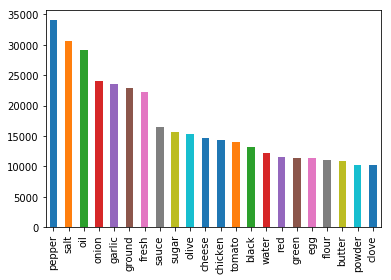

In [32]:
frequence[frequence>10000].plot.bar()

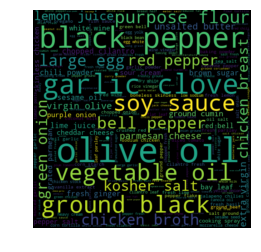

In [33]:
from wordcloud import WordCloud
 
# Create a list of word
text=' '.join(data['ingredients'])
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)


## Term Frequency – Inverse Document Frequency (TF-IDF)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
word_vect = tfidf.fit_transform(data['ingredients'])

In [35]:
df1 = pd.DataFrame(word_vect.toarray(), columns=tfidf.get_feature_names())
print(df1)

       achiote  active  added     adobo  agave  ale  alfredo  allspice  \
0          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
1          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
2          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
3          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
4          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
5          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
6          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
7          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
8          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
9          0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
10         0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
11         0.0     0.0    0.0  0.000000    0.0  0.0      0.0  0.000000   
12         0.0     0.0    0.0  0.00000

In [36]:
data.drop('ingredients', axis=1, inplace=True)

In [37]:
data=pd.concat([data, df1], axis=1)
data.head()

cuisine     id source  achiote  active  added  adobo  agave  ale  \
0        greek  10259  train      0.0     0.0    0.0    0.0    0.0  0.0   
1  southern_us  25693  train      0.0     0.0    0.0    0.0    0.0  0.0   
2     filipino  20130  train      0.0     0.0    0.0    0.0    0.0  0.0   
3       indian  22213  train      0.0     0.0    0.0    0.0    0.0  0.0   
4       indian  13162  train      0.0     0.0    0.0    0.0    0.0  0.0   

   alfredo    ...     yam  yeast    yellow  yoghurt    yogurt  yolk  yukon  \
0      0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
1      0.0    ...     0.0    0.0  0.279108      0.0  0.000000   0.0    0.0   
2      0.0    ...     0.0    0.0  0.270203      0.0  0.000000   0.0    0.0   
3      0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
4      0.0    ...     0.0    0.0  0.000000      0.0  0.196931   0.0    0.0   

   zest  ziti  zucchini  
0   0.0   0.0       0.0  
1   0.0   0.0       0.0  
2   0.0   0.0       0.0  
3   0.0   0.0       0.0  
4   0.0   0.0       0.0  

[5 rows x 1003 columns]

## Separating train and test

In [38]:
train = data[data['source']=='train']
test = data[data['source']=='test']

In [39]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','cuisine'],axis=1,inplace=True)

/home/ibtissem/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
train.head()

cuisine     id  achiote  active  added  adobo  agave  ale  alfredo  \
0        greek  10259      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
1  southern_us  25693      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
2     filipino  20130      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
3       indian  22213      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
4       indian  13162      0.0     0.0    0.0    0.0    0.0  0.0      0.0   

   allspice    ...     yam  yeast    yellow  yoghurt    yogurt  yolk  yukon  \
0       0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
1       0.0    ...     0.0    0.0  0.279108      0.0  0.000000   0.0    0.0   
2       0.0    ...     0.0    0.0  0.270203      0.0  0.000000   0.0    0.0   
3       0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
4       0.0    ...     0.0    0.0  0.000000      0.0  0.196931   0.0    0.0   

   zest  ziti  zucchini  
0   0.0   0.0       0.0  
1   0.0   0.0       0.0  
2   0.0   0.0       0.0  
3   0.0   0.0       0.0  
4   0.0   0.0       0.0  

[5 rows x 1002 columns]

In [41]:
train.head()

cuisine     id  achiote  active  added  adobo  agave  ale  alfredo  \
0        greek  10259      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
1  southern_us  25693      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
2     filipino  20130      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
3       indian  22213      0.0     0.0    0.0    0.0    0.0  0.0      0.0   
4       indian  13162      0.0     0.0    0.0    0.0    0.0  0.0      0.0   

   allspice    ...     yam  yeast    yellow  yoghurt    yogurt  yolk  yukon  \
0       0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
1       0.0    ...     0.0    0.0  0.279108      0.0  0.000000   0.0    0.0   
2       0.0    ...     0.0    0.0  0.270203      0.0  0.000000   0.0    0.0   
3       0.0    ...     0.0    0.0  0.000000      0.0  0.000000   0.0    0.0   
4       0.0    ...     0.0    0.0  0.000000      0.0  0.196931   0.0    0.0   

   zest  ziti  zucchini  
0   0.0   0.0       0.0  
1   0.0   0.0       0.0  
2   0.0   0.0       0.0  
3   0.0   0.0       0.0  
4   0.0   0.0       0.0  

[5 rows x 1002 columns]

In [42]:
test.head()

id  achiote  active  added  adobo  agave  ale  alfredo  allspice  \
39774  18009      0.0     0.0    0.0    0.0    0.0  0.0      0.0       0.0   
39775  28583      0.0     0.0    0.0    0.0    0.0  0.0      0.0       0.0   
39776  41580      0.0     0.0    0.0    0.0    0.0  0.0      0.0       0.0   
39777  29752      0.0     0.0    0.0    0.0    0.0  0.0      0.0       0.0   
39778  35687      0.0     0.0    0.0    0.0    0.0  0.0      0.0       0.0   

       almond    ...     yam  yeast    yellow  yoghurt  yogurt      yolk  \
39774     0.0    ...     0.0    0.0  0.000000      0.0     0.0  0.000000   
39775     0.0    ...     0.0    0.0  0.000000      0.0     0.0  0.222161   
39776     0.0    ...     0.0    0.0  0.000000      0.0     0.0  0.000000   
39777     0.0    ...     0.0    0.0  0.140108      0.0     0.0  0.000000   
39778     0.0    ...     0.0    0.0  0.000000      0.0     0.0  0.000000   

       yukon  zest  ziti  zucchini  
39774    0.0   0.0   0.0       0.0  
39775    0.0   0.0   0.0       0.0  
39776    0.0   0.0   0.0       0.0  
39777    0.0   0.0   0.0       0.0  
39778    0.0   0.0   0.0       0.0  

[5 rows x 1001 columns]

In [43]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)